In [ ]:
format ELF64
public _start
public exit

section '.bss' writable
symbols db 0xA, "AMVtdiYVETHnNhuYwnWDVBqL"

section '.text' executable
_start:
  mov rcx, 52
  .iter:
    push rcx

    mov rax, symbols
    add rax, rcx
    mov rcx, rax

    mov rax, 4
    mov rbx, 1
    mov rdx, 1
    int 0x80

    pop rcx

    dec rcx
    cmp rcx, -1
    jne .iter


  call exit


exit:
  mov rax, 1
  xor rbx, rbx
  int 0x80


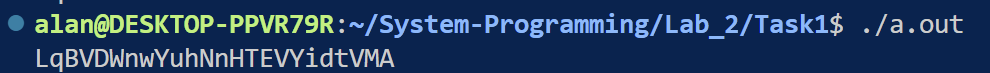

In [ ]:
format ELF64
public _start
public exit

section '.bss' writable
plus db "+"
newline db 0xA
N db 66
K db 6
M db 11

section '.text' executable
_start:
  mov cl, [M]

  .iter1:
    push rcx
    mov dl,[K]

    .iter2:
        push rdx
        mov rcx, plus

        mov rax, 4
        mov rbx, 1
        mov rdx, 1
        int 0x80
        pop rdx
        dec rdx
        cmp rdx, 0
        jne .iter2


    mov rax, 4
    mov rbx, 1
    mov rdx, 1
    mov rcx, newline
    int 0x80


    pop rcx
    dec rcx
    cmp rcx, 0
    jne .iter1


  call exit


exit:
  mov rax, 1
  xor rbx, rbx
  int 0x80


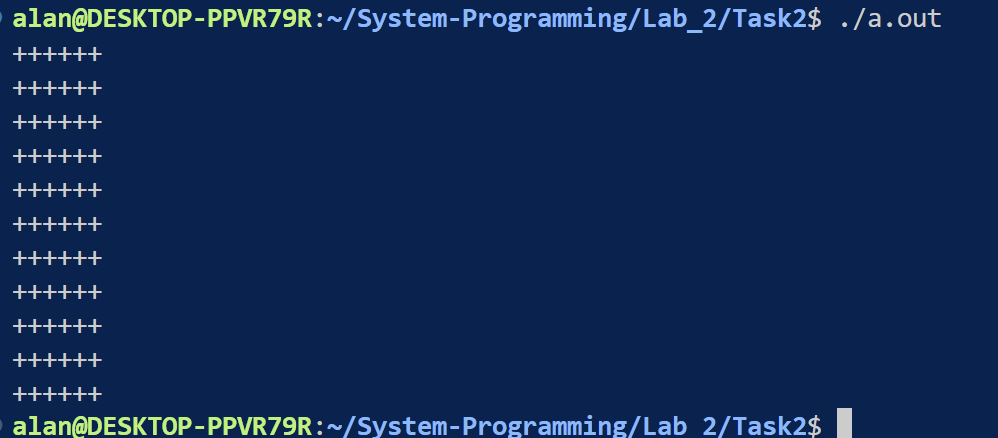

In [ ]:
format ELF64

public _start
public exit
public print

section '.bss' writable
  plus db 15 dup ('+')
  newline db 15 dup (0xA)
  place db 1
  num dq 0

section '.text' executable
  _start:
    xor rsi, rsi
    .iter1:
      xor rdi, rdi

      mov rbx, [num]
      inc rbx
      mov [num], rbx

      .iter2:
        mov al, [plus + rdi]
        call print
        inc rdi
        cmp rdi, [num]
        jne .iter2                    ;если не равны - продолжаем

      mov al, [newline + rsi]
      call print

      inc rsi
      cmp rsi, 11
      jne .iter1
    call exit

print:
  push rax
  mov [place], al
  mov rax, 4
  mov rbx, 1
  mov rcx, place
  mov rdx, 1
  int 0x80
  pop rax
  ret

exit:
  mov rax, 1
  mov rbx, 0
  int 0x80


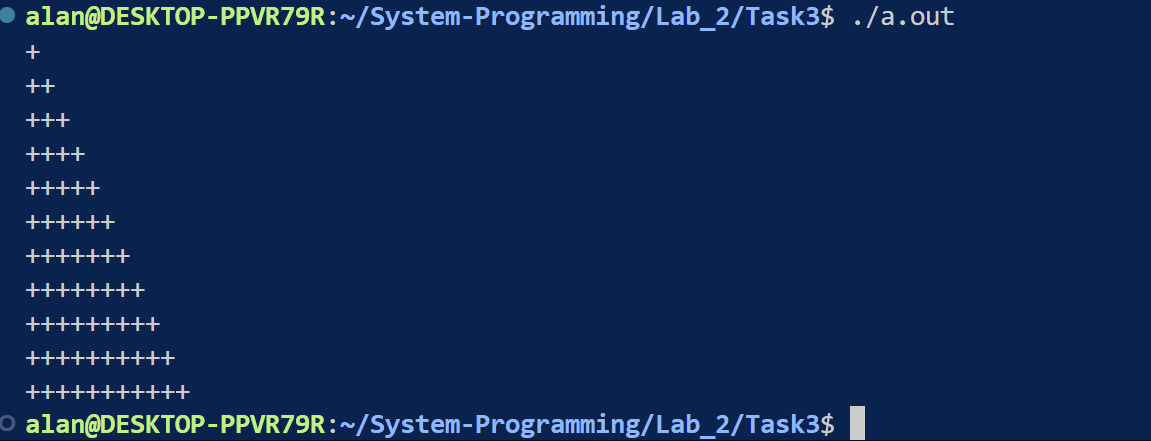

In [ ]:
format ELF64

public _start
public exit
public print

section '.data'
  nl db 10

section '.bss' writable
  num dq 5277616985
  ;str db 0xA
  res dq 0            ;сумма цифр
  ten dq 10
  place db 1          ; Место для временного хранения символа для вывода

section '.text' executable
  _start:
    mov rax, [num]
    xor rbx, rbx        ; для суммы цифр

    .sum_loop:
      xor rdx, rdx
      div qword [ten]         ;част в rax ост в rdx
      add rbx, rdx          ;остаток в сумму
      cmp rax, 0
      jne .sum_loop         ;если не 0, то продолжаем

    mov [res], rbx


    call print
    call newline

    mov rax, 60
    xor edi, edi
    call exit

newline:
    mov rax, 1            ; sys_write
    mov rdi, 1            ; stdout
    mov rsi, nl           ; указатель на символ новой строки
    mov rdx, 1            ; длина
    syscall
    ret

print:
    mov rax, [res]
    xor rbx, rbx

    cmp rax, 9
    jle .single_digit       ;если один разряд сразу вывод как символа

    mov rcx, 10             ;делитель
    .loop:
        xor rdx, rdx
        div rcx                ;час rax ост rdx
        push rdx               ;цифру в стек
        inc rbx
        test rax, rax           ;частно = 0
        jnz .loop

    .print_loop:
        pop rax
        add rax, '0'             ;аскии
        mov [place], al         ;вывод побайтово

        mov rax, 1
        mov rdi, 1
        mov rsi, place
        mov rdx, 1
        syscall

        dec rbx
        jnz .print_loop

        ret

    .single_digit:
        add rax, '0'
        mov [place], al

        mov rax, 1
        mov rdi, 1
        mov rsi, place
        mov rdx, 1
        syscall
        ret

exit:
  mov rax, 1
  mov rbx, 0
  int 0x80


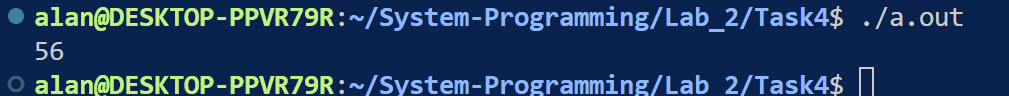

In [ ]:
format ELF64

public _start
public print

  num dq 568093600
  res dq 0
  ten dq 10
  place db 1          ; место для временного хранения символа для вывода


  _start:
    mov rax, [num]
    xor rbx, rbx

    .sum_loop:
      xor rdx, rdx
      div qword [ten]
      add rbx, rdx
      cmp rax, 0
      jne .sum_loop

    mov [res], rbx


    call print

    mov rax, 60
    xor rdi, edi
    mov rax, 1;exit
    mov rbx, 0
    int 0x80

print:
    mov rax, [res]
    xor rbx, rbx

    cmp rax, 9
    jle .single_digit

    mov rcx, 10
    .loop:
        xor rdx, rdx
        div rcx
        push rdx
        inc rbx
        test rax, rax
        jnz .loop

    .print_loop:
        pop rax
        add rax, '0'
        mov [place], al

        mov rax, 1
        mov rdi, 1
        mov rsi, place
        mov rdx, 1
        syscall

        dec rbx
        jnz .print_loop

        ret

    .single_digit:
        add rax, '0'
        mov [place], al

        mov rax, 1
        mov rdi, 1
        mov rsi, place
        mov rdx, 1
        syscall
        ret


In [ ]:
# include <stdio.h>
int main() {
    long num = 568093600;
    char sum = 0;    //int 4 byte, char 1
    for (; num; num /= 10) sum += num % 10;    //while дольше работает пока в num есть числа
    printf("%d\n", sum);
    return 0;
}


In [ ]:
# include <stdio.h>

int main() {
    long long num = 568093600;
    int sum = 0;

    while (num > 0) {
        sum += num % 10;
        num /= 10;
    }

    printf("%d\n", sum);
    return 0;
}
